<a href="https://colab.research.google.com/github/hma23/CIM_Demo/blob/master/Extratree_multioutputRegression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#To know sklearn version
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.0.2


In [ ]:
#To show all records for our data frame
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 500)
pd.get_option("display.max_rows")

500

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install pandas==0.23.0
# !pip install pycaret

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/data/Book1_new.xlsx')
df = pd.read_excel('/content/drive/MyDrive/data/CPU_Book1_new1_2_1.xlsx',engine = 'openpyxl')
#uncomment next line to show all values
df.head(10)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Block_period,Block_size,Intensity,Throughput,Latency,mac_type,Number_of_peers,Bandwidth_gbps,Ratio of bandwidth to number of peers
0,1.0,13.0,High,89.0,71.048,m1.medium,1.0,1.000,1.00
1,2.0,13.0,High,43.0,146.048,m1.medium,2.0,0.979,0.49
2,3.0,13.0,High,28.0,218.549,m1.medium,4.0,0.900,0.23
3,4.0,13.0,High,20.0,291.848,m1.medium,8.0,0.800,0.10
4,5.0,13.0,High,17.0,365.552,m1.medium,16.0,0.700,0.04
5,6.0,13.0,High,14.0,437.861,m1.medium,16.0,0.850,0.05
6,7.0,13.0,High,12.0,512.076,m1.medium,3.0,0.886,0.30
7,8.0,13.0,High,11.0,586.079,m1.medium,3.0,0.776,0.26
8,9.0,13.0,High,10.0,659.079,m1.medium,3.0,0.700,0.23
9,10.0,13.0,High,9.0,731.070,m1.medium,3.0,0.701,0.23


## Exploratry Data Analysis (EDA)

In [ ]:
df.describe()

,Block_period,Block_size,Throughput,Latency,Number_of_peers,Bandwidth_gbps,Ratio of bandwidth to number of peers
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,6.631579,12.226316,46.052632,412.643607,5.710526,0.702737,0.227105
std,3.824324,3.342265,62.498824,387.241382,5.235754,0.258085,0.201414
min,1.000000,7.000000,3.000000,11.035000,1.000000,0.100000,0.020000
25%,4.000000,10.000000,9.250000,104.718917,3.000000,0.478000,0.072500
50%,5.000000,13.000000,26.000000,251.401000,3.000000,0.700000,0.210000
75%,10.000000,14.000000,62.000000,659.292825,8.000000,0.977250,0.310000
max,14.000000,21.000000,589.000000,1645.100000,16.000000,1.000000,1.000000


In [ ]:
#sns.pairplot(df, height=3, aspect=1.3)

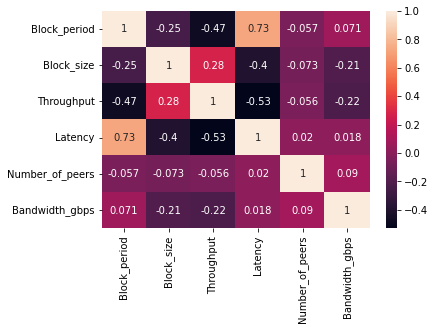

In [ ]:
#heat_map without ratio
df_heat = df.copy()
df_heat.drop(columns = ['Ratio of bandwidth to number of peers'],inplace = True)
sns.heatmap(df_heat.corr(), annot=True)

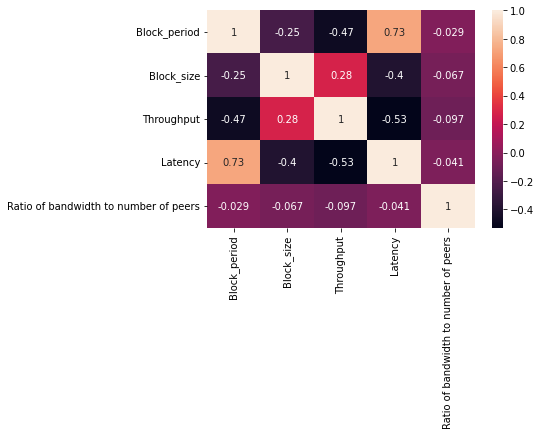

In [ ]:
#heat_map with ratio
df_heatfe = df.copy()
df_heatfe.drop(columns = ['Number_of_peers', 'Bandwidth_gbps'],inplace = True)
sns.heatmap(df_heatfe.corr(), annot=True)

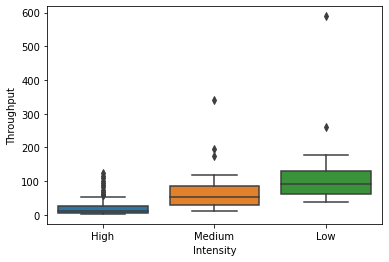

In [ ]:
sns.boxplot(x="Intensity", y="Throughput", data=df)

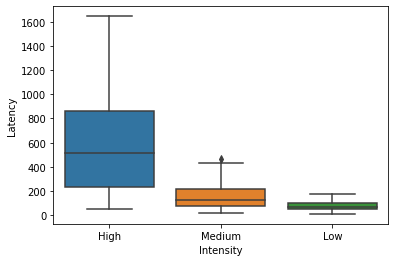

In [ ]:
sns.boxplot(x="Intensity", y="Latency", data=df)

## Data Preprocessing

In [ ]:
# df.drop('Number_of_peers', axis=1, inplace=True)
df_output = df.copy()

#drop latency beuse it's output variable and can not be used as input featuers for another outputs
df_output.drop('Latency', axis=1, inplace=True)

#First approch (default)
# Make dummies for our catagorial variables to make it able to insert to machine learning models
df_ouput_dum = pd.get_dummies(df_output, prefix=['Intensity','mac_type'], columns=['Intensity','mac_type'])

#uncomment next line to show all values
# df_ouput_dum

In [ ]:
#Second approch
# We will try to convert the intenisty to ordinal numbers and see the difference in accurcy using pycaret 
df_ouput_ord = df_output.copy()
df_ouput_ord = df_ouput_ord.replace({"Intensity":{"Low": 23600, "Medium": 35788, "High":143362 }})
df_ouput_ord = df_ouput_ord.replace({"mac_type":{"m1.medium": 2, "m1.large": 4, "m1.xlarge":8 }})
# df_ouput_ord['prod'] = df_ouput_ord['Number_of_peers']* df_ouput_ord['Bandwidth']
# df_ouput_ord.drop(['Number_of_peers','Bandwidth'], axis=1, inplace=True)
#uncomment next line to show all values
# df_ouput_ord

## Feature selection based on select from model function

---



In [ ]:
#for Not featuered engineer data
x_nonfe = df_ouput_dum.copy()
x_nonfe.drop(columns = ['Throughput','Ratio of bandwidth to number of peers'],inplace = True)
x_nonfe.head()

,Block_period,Block_size,Number_of_peers,Bandwidth_gbps,Intensity_High,Intensity_Low,Intensity_Medium,mac_type_m1.large,mac_type_m1.medium,mac_type_m1.xlarge
0,1.0,13.0,1.0,1.000,1,0,0,0,1,0
1,2.0,13.0,2.0,0.979,1,0,0,0,1,0
2,3.0,13.0,4.0,0.900,1,0,0,0,1,0
3,4.0,13.0,8.0,0.800,1,0,0,0,1,0
4,5.0,13.0,16.0,0.700,1,0,0,0,1,0


In [ ]:
#create dummy variables to test if featuer selection will erase them or not
dummy_df = df_ouput_ord.copy()
# np.random.seed(2)
# dummy_df['dummy1'] = np.random.choice([.001,.002,.005,.008,300000,.905,6000,4.5,2.005], size=190)
# dummy_df['dummy2'] = np.random.choice([.000001,10,10.5,10.6,.1255,5000,4.5,1.01], size=190)
# dummy_df['dummy3'] = np.random.choice([.001,10,1000,.141,.1255,5000,4.5,1.001,2,3,4], size=190)
# dummy_df['dummy4'] = np.random.choice([0,1,10,50], size=190)

#cretae catagorial dunny variable
# dummy_df['dummy5'] = np.random.choice(['hima','govind','bi'], size=190)
# dummy_df = pd.get_dummies(dummy_df, prefix=['dummy5'], columns=['dummy5'])

dummy_df.head()

,Block_period,Block_size,Intensity,Throughput,mac_type,Number_of_peers,Bandwidth_gbps,Ratio of bandwidth to number of peers
0,1.0,13.0,143362,89.0,2,1.0,1.000,1.00
1,2.0,13.0,143362,43.0,2,2.0,0.979,0.49
2,3.0,13.0,143362,28.0,2,4.0,0.900,0.23
3,4.0,13.0,143362,20.0,2,8.0,0.800,0.10
4,5.0,13.0,143362,17.0,2,16.0,0.700,0.04


In [ ]:
#for featuered engineer approch
#split our data to y that contain our output "Throughput" and to x that conatin the featuers inputs for our model
y_output=dummy_df['Throughput']
x_output=dummy_df.copy()
x_output.drop(columns = ['Throughput'],inplace = True)
x_output.head()

,Block_period,Block_size,Intensity,mac_type,Number_of_peers,Bandwidth_gbps,Ratio of bandwidth to number of peers
0,1.0,13.0,143362,2,1.0,1.000,1.00
1,2.0,13.0,143362,2,2.0,0.979,0.49
2,3.0,13.0,143362,2,4.0,0.900,0.23
3,4.0,13.0,143362,2,8.0,0.800,0.10
4,5.0,13.0,143362,2,16.0,0.700,0.04


In [ ]:
#For regression models
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import ExtraTreesRegressor

# feature_names = np.array(x_output.columns)
# selector = SelectFromModel(estimator=ExtraTreesRegressor(random_state=35),threshold=0.04).fit(x_output, y_output)
# selector.estimator_.feature_importances_ 

In [ ]:
# x_trans = selector.transform(x_output)
# x_trans.shape

In [ ]:
# x_trans = pd.DataFrame(x_trans)
# x_trans.columns = feature_names[selector.get_support()]
# # x_trans['Ratio of Number of miners to bandwidth'] = x_output['Ratio of Number of miners to bandwidth']
# x_trans.head()

In [ ]:
x_trans = x_output.copy()
x_trans.drop(columns = ['Number_of_peers','Bandwidth_gbps'],inplace = True)
x_trans.head()

,Block_period,Block_size,Intensity,mac_type,Ratio of bandwidth to number of peers
0,1.0,13.0,143362,2,1.00
1,2.0,13.0,143362,2,0.49
2,3.0,13.0,143362,2,0.23
3,4.0,13.0,143362,2,0.10
4,5.0,13.0,143362,2,0.04


# Box Output Prediction and graphs

## Comparison between different Models

### setup pycaret

In [ ]:
# !pip install pycaret

In [ ]:
# from pycaret.regression import *

### Comaprison between predictions of Throughput

In [ ]:
#just make comparison without ratio featuer because it will filtered in selectfrommodel function in next cells
# df_pycaret = df_ouput_ord.copy()
# df_pycaret.drop(['Number_of_peers'], axis=1,inplace = True)
# exp_reg101 = setup(data = df_pycaret, target = 'Throughput', numeric_features = ['Block_period','Block_size','Intensity','mac_type','Ratio of bandwidth to number of peers'], session_id=123)

In [ ]:
# compare_models()

**After apply pycaret regression with intensty numirc ordinal and dummies variable we note that max accurcy for dummies approch with is with gradiant boast regressor with R2 = .93 and for numirc ordianal the best model is extra tree regressor with R2 = .94 so numirc approch is slightly better than dummies variable**

## Get Best Random state

In [ ]:
#here I made a function that looping over different random states to get the best one that get best accurecy 
# from sklearn.ensemble import ExtraTreesRegressor

# def reg_out(rand):
#   for i in range(rand):
#     print('random state is',i)
#     X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_trans, y_output, test_size = 0.2, random_state = i)
#     reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                         max_depth=None, max_features='auto', max_leaf_nodes=None,
#                         max_samples=None, min_impurity_decrease=0.0,
#                         min_samples_leaf=1,
#                         min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
#                         verbose=0, warm_start=False).fit(X_train_output, y_train_output)

#     R2_score = reg.score(X_test_output, y_test_output)
#     print("R2 score for this model is", R2_score)
#     y_pred_output = reg.predict(X_test_output)
#     MSE = ((y_pred_output-y_test_output)**2).mean()
#     RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
#     print("RMSE score for this model is", RMSE)

# reg_out(50)

## Extra Tree regressor for Throughput prediction

In [ ]:
#from above equation we can note that the best random state is 1 to make model learning well and generlize for validation data
# X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_trans, y_output, test_size = 0.2, random_state = 12)
# reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                     max_depth=None, max_features='auto', max_leaf_nodes=None,
#                     max_samples=None, min_impurity_decrease=0.0,
#                     min_samples_leaf=1,
#                     min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
#                     verbose=0, warm_start=False).fit(X_train_output, y_train_output)

# R2_score = reg.score(X_test_output, y_test_output)
# print("R2 score for this model is", R2_score)
# y_pred_output = reg.predict(X_test_output)
# MSE = ((y_pred_output-y_test_output)**2).mean()
# RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
# print("RMSE score for this model is", RMSE)

In [ ]:
# y_pred_output

In [ ]:
# from sklearn.metrics import mean_squared_error
# sk_mse_out = mean_squared_error(y_test_output, y_pred_output)
# sk_rmse_out = sk_mse_out**.5
# print("RMSE score for this model is", sk_rmse_out)

### *optimization* for Extra tree model using grid search function 

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import ExtraTreesRegressor
# #define your own mse and set greater_is_better=False
# # mse = make_scorer(mean_squared_error,greater_is_better=False)

# etr = ExtraTreesRegressor().fit(X_train_output, y_train_output)
                            
# param_grid = {
#     'n_estimators': [100,120],
#     'criterion': ['mse', 'mae'],
#     'max_features': ['auto','sqrt','log2'],  
#     'min_samples_split': [1,2]
# }

# gcv = GridSearchCV(etr,param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1).fit(X_train_output,y_train_output)

# print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

**We can note here that the grid search here don't give help to us because we not able to minmize the rmse using it**

## MAE Visualization

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# def get_mae(model,x):
#   train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#   mae_list = []

#   #recreate dataframe from x and y_output
#   df_output_fun = x.copy()
#   df_output_fun['Throughput'] = y_output

#   for size in train_size:
#     #get random required size from our data
#     df_output_sampled = df_output_fun.sample(frac=size,random_state=3)

#     #x
#     x_output_sample=df_output_sampled.copy()
#     x_output_sample.drop(columns = ['Throughput'],inplace = True)

#     #y
#     y_output_sample=df_output_sampled["Throughput"]


#     X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_output_sample, y_output_sample, test_size = 0.2, random_state = 2)
#     reg = model.fit(X_train_output, y_train_output)
#     y_pred_output = reg.predict(X_test_output)
#     mae = mean_absolute_error(y_test_output,y_pred_output)
#     mae_list.append(mae)
#   return mae_list

# grad_model = GradientBoostingRegressor(random_state=12)
# et_model = ExtraTreesRegressor(random_state=12)
# rf_model = RandomForestRegressor(random_state=12)
# models = {'Gpr':grad_model,'et':et_model,'rf':rf_model}

# #for fe data
# mae_fe_vis = pd.DataFrame()
# mae_fe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
# for model_key,model_val in models.items():
#   mae_fe_vis[f'mae_of {model_key}'] = get_mae(model_val,x_trans)

# #for nonfe data
# mae_nonfe_vis = pd.DataFrame()
# mae_nonfe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
# for model_key,model_val in models.items():
#   mae_nonfe_vis[f'nonfe_mae_of {model_key}'] = get_mae(model_val,x_nonfe)

# mae_nonfe_vis

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of Gpr'], 'ko-',markersize=10, label='MAE of gpr')
# plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of et'],'^k-',markersize=10, label='MAE of et')
# plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of rf'],'Pk-',markersize=10, label='MAE of rf')

# plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of Gpr'], 'ko--',markersize=10, label='NoN FE MAE of gpr')
# plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of et'],'^k--',markersize=10, label='NoN FE MAE of et')
# plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of rf'],'Pk--',markersize=10, label='NoN FE MAE of rf')
# plt.ylabel('MAE')
# plt.xlabel('Data size')
# plt.legend()
# plt.show()

## RMSE Visualization

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# def RMSE_model(rand,model,X,y):
#   rmse_list = []
#   for i in range(rand):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
#     reg = model.fit(X_train, y_train)
#     y_pred = reg.predict(X_test)
#     RMSE = (((y_pred-y_test)**2).mean())**.5
#     rmse_list.append(RMSE)
#   return rmse_list


# grad_model = GradientBoostingRegressor(random_state=12)
# et_model = ExtraTreesRegressor(random_state=12)
# rf_model = RandomForestRegressor(random_state=12)
# models = {'Gpr':grad_model,'et':et_model,'rf':rf_model}

# rmse_fe = pd.DataFrame()

# #for featuered engineerd data
# for model_key,model_val in models.items():
#   rmse_fe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_trans,y_output)

# rmse_fe_melted=pd.melt(rmse_fe)
# rmse_fe_melted['type'] = 'fe'
# rmse_fe_melted.head()

In [ ]:
# #for NON featuered engineerd data
# rmse_nonfe = pd.DataFrame()
# for model_key,model_val in models.items():
#   rmse_nonfe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_output,y_output)

# rmse_nonfe_melted=pd.melt(rmse_nonfe)
# rmse_nonfe_melted['type'] = 'nonfe'
# # rmse_nonfe_melted

In [ ]:
# rmse_all = pd.concat([rmse_fe_melted,rmse_nonfe_melted])
# # rmse_all

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(8, 6), dpi=80)
# ax = sns.boxplot(x="variable", y="value", hue="type",
#                  data=rmse_all, palette="Set3")
# plt.legend(loc='upper left')
# plt.ylabel('RMSE Range')
# plt.xlabel('Model')
# plt.show()

# Latency Prediction 


## Data preprocessing

In [ ]:
# df_latency = df.copy()

# #drop Throughput beuse it's output variable and can not be used as input featuers for another outputs
# df_latency.drop('Throughput', axis=1, inplace=True)

# #First approch
# # Make dummies for our catagorial variables to make it able to insert to machine learning models
# df_laten_dum = pd.get_dummies(df_latency, prefix=['Intensity'], columns=['Intensity'])
# #uncomment next line to show all values
# # df_laten_dum

In [ ]:
# #Secound approch
# #for numircal ordinal variable approche
# df_laten_ord = df_latency.copy()
# df_laten_ord = df_laten_ord.replace({"Intensity":{"Low": 23600, "Medium": 35788, "High":143362 }})
# df_laten_ord = df_laten_ord.replace({"mac_type":{"m1.medium": 2, "m1.large": 4, "m1.xlarge":8 }})

# #uncomment one of next line to show it's values
# # df_laten_ord

## Comparison between different models in pycaret

In [ ]:
# #just make comparison without ratio featuer because it will filtered in selectfrommodel function in next cells
# df_pycaret = df_ouput_ord.copy()
# df_pycaret.drop('Ratio of bandwidth to number of peers', axis=1,inplace = True)
# exp_reg101 = setup(data = df_laten_ord, target = 'Latency', numeric_features = ['Block_period','Block_size','Intensity','mac_type'], session_id=123)

In [ ]:
# compare_models()

## Feature selection based on select from model function For latency


In [ ]:
# #create dummy variables to test if featuer selection will erase them or not
# dummy_lat_df = df_laten_ord.copy()
# # np.random.seed(2)
# # dummy_lat_df['dummy1'] = np.random.choice([.001,.002,.005,.008,300000,.905,6000,4.5,2.005], size=190)
# # dummy_lat_df['dummy2'] = np.random.choice([.000001,10,10.5,10.6,.1255,5000,4.5,1.01], size=190)
# # dummy_lat_df['dummy3'] = np.random.choice([.001,10,1000,.141,.1255,5000,4.5,1.001,2,3,4], size=190)
# # dummy_lat_df['dummy4'] = np.random.choice([0,1,10,50], size=190)

# # #cretae catagorial dunny variable
# # dummy_lat_df['dummy5'] = np.random.choice(['hima','govind','bi'], size=190)
# # dummy_lat_df = pd.get_dummies(dummy_lat_df, prefix=['dummy5'], columns=['dummy5'])
# dummy_lat_df.head()

In [ ]:
# #split our data to y that contain our output "Latency" and to x that conatin the featuers inputs for our model
# y_lat=dummy_lat_df["Latency"]
# x_lat=dummy_lat_df.copy()
# x_lat.drop(columns = ['Latency'],inplace = True)
# # x_lat.head()

# #split x,y to train and test to measure the accurcy of the model
# X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_lat, y_lat, test_size = .2, random_state = 43)

In [ ]:
# #As featuer engineering we will use the featuers got from pervious featuer engineer in output prdiction
# x_trans.head()

## Extra Tree Regressor for Latency

In [ ]:
# #here I made a function that looping over different random states to get the best one that get best accurecy 
# from sklearn.ensemble import ExtraTreesRegressor

# def reg_out(rand):
#   for i in range(rand):
#     print('random state is',i)
#     X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_trans, y_lat, test_size = .2, random_state = i)
#     reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                         max_depth=None, max_features='auto', max_leaf_nodes=None,
#                         max_samples=None, min_impurity_decrease=0.0,
#                         min_samples_leaf=1,
#                         min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
#                         verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

#     R2_score = reg.score(X_test_lat, y_test_lat)
#     print("R2 score for this model is", R2_score)
#     y_pred_lat = reg.predict(X_test_lat)
#     MSE = ((y_pred_lat-y_test_lat)**2).mean()
#     RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
#     print("RMSE score for this model is", RMSE)

# # reg_out(50)

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor

# X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_trans, y_lat, test_size = .2, random_state = 1)
# reg_lat = ExtraTreesRegressor(n_estimators=100, random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                     max_depth=None, max_features='auto', max_leaf_nodes=None,
#                     max_samples=None, min_impurity_decrease=0.0,
#                     min_impurity_split=None, min_samples_leaf=1,
#                     min_samples_split=2, min_weight_fraction_leaf=0.0,
#                     n_jobs=-1, oob_score=False,
#                     verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)
# # reg.score(X_test_lat, y_test_lat)

# R2_score = reg_lat.score(X_test_lat, y_test_lat)
# print("R2 score for this model is", R2_score)
# y_pred_lat = reg_lat.predict(X_test_lat)
# MSE = ((y_pred_lat-y_test_lat)**2).mean()
# RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
# print("RMSE score for this model is", RMSE)


In [ ]:
# # RMSE for validation data
# from sklearn.metrics import mean_squared_error
# sk_mse = mean_squared_error(y_test_lat, y_pred_lat)
# sk_rmse = sk_mse**.5
# print("RMSE score for this model is", sk_rmse)

## hyper parameter tuning for latency prediction

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error

# etr_lat = ExtraTreesRegressor(n_estimators=100,random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                     max_depth=None, max_features='auto', max_leaf_nodes=None,
#                     max_samples=None, min_impurity_decrease=0.0,
#                     min_impurity_split=None, min_samples_leaf=1,
#                     min_samples_split=2, min_weight_fraction_leaf=0.0,
#                     n_jobs=-1, oob_score=False,
#                     verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

                            
# param_grid = {
#     'n_estimators': [50,100],
#     'max_depth': [50,60,80,None],
#     'max_features': ['auto','sqrt','log2'],    
# }

# gcv = GridSearchCV(etr_lat,param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1).fit(X_train_lat,y_train_lat)

# print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

## MAE Visualization For Latency

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# def get_mae(model_val):
#   train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#   mae_list = []

#   #recreate dataframe from x_trans and y_lat
#   df_lat = x_trans.copy()
#   df_lat['Latency'] = y_lat

#   for size in train_size:
#     #get random required size from our data
#     df_lat_sampled = df_lat.sample(frac=size,random_state=7)

#     #x
#     x_lat_sample=df_lat_sampled.copy()
#     x_lat_sample.drop(columns = ['Latency'],inplace = True)

#     #y
#     y_lat_sample=df_lat_sampled["Latency"]


#     X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_lat_sample, y_lat_sample, test_size = 0.2, random_state = 44)
#     reg = model_val.fit(X_train_lat, y_train_lat)
#     y_pred_lat = reg.predict(X_test_lat)
#     mae = mean_absolute_error(y_test_lat,y_pred_lat)
#     mae_list.append(mae)
#   return mae_list

# grad_model = GradientBoostingRegressor(random_state=12)
# et_model = ExtraTreesRegressor(random_state=12)
# rf_model = RandomForestRegressor(random_state=12)
# models = {'Gpr':grad_model,'et':et_model,'rf':rf_model}

# mae_vis_lat = pd.DataFrame()
# mae_vis_lat['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']

# for model_key,model_val in models.items():
#   mae_vis_lat[f'mae_of {model_key}'] = get_mae(model_val)
# mae_vis_lat

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of Gpr'], 'ko-',markersize=10, label='MAE of gpr')
# plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of et'],'^k-',markersize=10, label='MAE of et')
# plt.plot(mae_vis_lat['Data size'], mae_vis_lat['mae_of rf'],'Pk-',markersize=10, label='MAE of rf')
# plt.ylabel('MAE')
# plt.xlabel('Data size')
# plt.legend()
# plt.show()

## RMSE Visualization For Latency

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# def RMSE_model(rand,model,X,y):
#   rmse_list = []
#   for i in range(rand):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
#     reg = model.fit(X_train, y_train)
#     y_pred = reg.predict(X_test)
#     RMSE = (((y_pred-y_test)**2).mean())**.5
#     rmse_list.append(RMSE)
#   return rmse_list


# grad_model = GradientBoostingRegressor(random_state=12)
# et_model = ExtraTreesRegressor(random_state=12)
# rf_model = RandomForestRegressor(random_state=12)
# models = {'Gpr':grad_model,'et':et_model,'rf':rf_model}

# rmse_lat_fe = pd.DataFrame()

# #for featuered engineerd data
# for model_key,model_val in models.items():
#   rmse_lat_fe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_trans,y_lat)

# rmse_lat_fe_melted=pd.melt(rmse_lat_fe)
# rmse_lat_fe_melted['type'] = 'fe'
# rmse_lat_fe_melted.head()

In [ ]:
# #for NON featuered engineerd data
# rmse_lat_nonfe = pd.DataFrame()
# for model_key,model_val in models.items():
#   rmse_lat_nonfe[f'rmse_of {model_key}'] = RMSE_model(50,model_val,x_lat,y_lat)

# rmse_lat_nonfe_melted=pd.melt(rmse_lat_nonfe)
# rmse_lat_nonfe_melted['type'] = 'nonfe'
# # rmse_lat_nonfe_melted

In [ ]:
# rmse_all_lat = pd.concat([rmse_lat_fe_melted,rmse_lat_nonfe_melted])
# # rmse_all_lat

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# ax = sns.boxplot(x="variable", y="value", hue="type",
#                  data=rmse_all_lat, palette="Set3")

# plt.ylabel('RMSE Range')
# plt.xlabel('Model')
# plt.show()

#Multioutput prediction and graphs

## MultiOutputRegressor for Throughput and latency prediction

In [ ]:
# !pip install scikit-learn==0.24.1
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [ ]:
#for featered engineer data
#split our data to y that contain our outputs "Throughput","Latency" and to x that conatin the featuers inputs for our model
y_multi=df[["Throughput","Latency"]]
x_multi=x_trans.copy()

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 12)

In [ ]:
#apply extra tree regressor for multioutput
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'et':et_model,'gb':grad_model,'rf':rf_model}

for model_key,model_val in models.items():
  # X_multi, y_multi = load_linnerud(return_X_y=True)
  multi_model = MultiOutputRegressor(model_val).fit(X_train_multi, y_train_multi)
  y_pred_multi = multi_model.predict(X_test_multi)


  # 2 output prdiction acuurcy
  print(f'for model {model_key}')
  #r2 score for 2 output
  combined_r2_score = r2_score(y_test_multi, y_pred_multi)
  print("R2 score for multi_output", combined_r2_score)

  #rmse for 2 output
  mse_combined = mean_squared_error(y_test_multi, y_pred_multi)
  rmse_combined = mse_combined**.5
  print("RMSE score for multi_output", rmse_combined)

  #mae for 2 output
  combined_mae = mean_absolute_error(y_test_multi, y_pred_multi)
  print("mae for multi_output", combined_mae)

  #mape for 2 output
  combined_mape = mean_absolute_percentage_error(y_test_multi, y_pred_multi)
  print("mape for multi_output", combined_mape)

for model et
R2 score for multi_output 0.988714884534972
RMSE score for multi_output 20.245255784226792
mae for multi_output 11.083498114412382
mape for multi_output 0.06889989197662533
for model gb
R2 score for multi_output 0.9814065340163259
RMSE score for multi_output 30.641441454756258
mae for multi_output 17.125947397755535
mape for multi_output 0.10417023310997178
for model rf
R2 score for multi_output 0.9709147690520605
RMSE score for multi_output 31.381700510521476
mae for multi_output 16.939925252802936
mape for multi_output 0.10714570880334082


In [ ]:
y_pred_multi[:,0].mean()

36.112631578947365

In [ ]:
#for nonfeatered engineer data
#split our data to y that contain our outputs "Throughput","Latency" and to x that conatin the featuers inputs for our model
y_multi=df[["Throughput","Latency"]]
x_multi_nonfe=x_nonfe.copy()

X_train_multi_nonfe, X_test_multi_nonfe, y_train_multi_nonfe, y_test_multi_nonfe = train_test_split(x_multi_nonfe, y_multi, test_size = 0.2, random_state = 12)

In [ ]:
#apply extra tree regressor for multioutput
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

grad_model = GradientBoostingRegressor(random_state=0)
et_model = ExtraTreesRegressor(random_state=0)
rf_model = RandomForestRegressor(random_state=0)
models = {'et':et_model,'gb':grad_model,'rf':rf_model}

for model_key,model_val in models.items():
  # X_multi, y_multi = load_linnerud(return_X_y=True)
  multi_model_nonfe = MultiOutputRegressor(model_val).fit(X_train_multi_nonfe, y_train_multi_nonfe)
  y_pred_multi_nonfe = multi_model_nonfe.predict(X_test_multi_nonfe)


  # # 2 output prdiction acuurcy
  # print(f'for model {model_key}')
  # #r2 score for 2 output
  # combined_r2_score_nonfe = r2_score(y_test_multi_nonfe, y_pred_multi_nonfe)
  # print("R2 score for multi_output", combined_r2_score_nonfe)

  # #rmse for 2 output
  # mse_combined_nonfe = mean_squared_error(y_test_multi_nonfe, y_pred_multi_nonfe)
  # rmse_combined_nonfe = mse_combined_nonfe**.5
  # print("RMSE score for multi_output", rmse_combined_nonfe)

  # #mae for 2 output
  # combined_mae_nonfe = mean_absolute_error(y_test_multi_nonfe, y_pred_multi_nonfe)
  # print("mae for multi_output", combined_mae_nonfe)

  # #mae for 2 output
  # combined_mape_nonfe = mean_absolute_percentage_error(y_test_multi_nonfe, y_pred_multi_nonfe)
  # print("mape for multi_output", combined_mape_nonfe)

## Predict with new inputs

In [ ]:
predict_new = multi_model.predict([[1.0,12.0,143362,2,2]])
predict_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([[83.28      , 83.56864799]])

In [ ]:
predict_new[0,1]

83.56864798755409

## MAE Visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor

def get_mae(model,x):
  train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
  mae_list = []

  #recreate dataframe from x_multi and y_multi
  df_multi_fun = x.copy()
  df_multi_fun[["Throughput","Latency"]] = df[["Throughput","Latency"]].copy()

  for size in train_size:
    #get random required size from our data
    df_multi_sampled = df_multi_fun.sample(frac=size,random_state=3)

    #x
    x_multi_sample=df_multi_sampled.copy()
    x_multi_sample.drop(columns = ['Throughput','Latency'],inplace = True)

    #y
    y_multi_sample=df_multi_sampled[["Throughput","Latency"]]


    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi_sample, y_multi_sample, test_size = 1-size, random_state = 1)
    reg =  MultiOutputRegressor(model).fit(X_train_multi, y_train_multi)
    y_pred_multi = reg.predict(X_test_multi)
    mae = mean_absolute_error(y_test_multi,y_pred_multi)
    mae_list.append(mae)
  return mae_list

In [ ]:
from scipy.sparse.construct import random
#make the dataframe for mae for fe and nonfe data
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

#for fe data
mae_fe_vis = pd.DataFrame()
mae_fe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']
for model_key,model_val in models.items():
  mae_fe_vis[f'mae_of {model_key}'] = get_mae(model_val,x_trans)

#for nonfe data
mae_nonfe_vis = pd.DataFrame()
mae_nonfe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']
for model_key,model_val in models.items():
  mae_nonfe_vis[f'nonfe_mae_of {model_key}'] = get_mae(model_val,x_nonfe)

mae_nonfe_vis

,Data size,nonfe_mae_of gb,nonfe_mae_of et,nonfe_mae_of rf
0,10%,290.645462,290.645462,290.645462
1,20%,154.014549,119.106007,147.428078
2,30%,116.189101,59.751476,127.278945
3,40%,77.941735,40.282151,84.312198
4,50%,33.931925,33.501571,47.593023
5,60%,29.707215,33.025869,39.843780
6,70%,41.791506,24.221995,41.927570
7,80%,16.503228,15.075004,26.331930
8,90%,30.515166,19.575545,30.835031


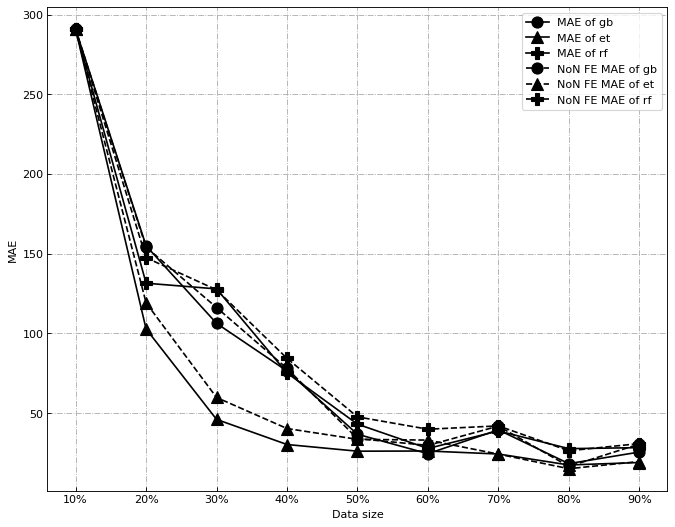

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
plt.grid('both', linestyle='-.')
plt.tick_params(axis='both', direction='in')
plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of gb'], 'ko-',markersize=10, label='MAE of gb')
plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of et'],'^k-',markersize=10, label='MAE of et')
plt.plot(mae_fe_vis['Data size'], mae_fe_vis['mae_of rf'],'Pk-',markersize=10, label='MAE of rf')

plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of gb'], 'ko--',markersize=10, label='NoN FE MAE of gb')
plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of et'],'^k--',markersize=10, label='NoN FE MAE of et')
plt.plot(mae_nonfe_vis['Data size'], mae_nonfe_vis['nonfe_mae_of rf'],'Pk--',markersize=10, label='NoN FE MAE of rf')

plt.ylabel('MAE')
plt.xlabel('Data size')
plt.legend()

plt.show()

##aRRMSE visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def get_rrmse(model,x):
  train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
  rrmse_list = []
  #rrmse_list = np.array([], dtype=float)

  #recreate dataframe from x_multi and y_multi
  df_multi_fun = x.copy()
  df_multi_fun[["Throughput","Latency"]] = df[["Throughput","Latency"]].copy()

  for size in train_size:
    #x
    x_multi_sample=df_multi_fun.copy()
    x_multi_sample.drop(columns = ['Throughput','Latency'],inplace = True)

    #y
    y_multi_sample=df_multi_fun[["Throughput","Latency"]]


    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi_sample, y_multi_sample, test_size = 1-size, random_state = 12)
    reg =  MultiOutputRegressor(model).fit(X_train_multi, y_train_multi)
    y_pred_multi = reg.predict(X_test_multi)

    # rrmse_of_y_pred_throuhput = mean_squared_error(y_test_multi['Throughput'], y_pred_multi[:,0])**.5/(y_pred_multi[:,0].mean())
    # rrmse_of_y_pred_latency = mean_squared_error(y_test_multi['Latency'], y_pred_multi[:,1])**.5/(y_pred_multi[:,1].mean())

    #This is the formula of NRMSE which is RMSE divided by mean of the measured values. aNRMSE is average of NRMSE of all target variables.
    #rrmse_of_y_pred_throuhput = mean_squared_error(y_test_multi['Throughput'], y_pred_multi[:,0])**.5/(y_test_multi['Throughput'].mean())    
    #rrmse_of_y_pred_latency = mean_squared_error(y_test_multi['Latency'], y_pred_multi[:,1])**.5/(y_test_multi['Latency'].mean())

    y_test_multi['y_train_multi_mean_late'] = y_train_multi['Latency'].mean()
    y_test_multi['y_train_multi_mean_through'] = y_train_multi['Throughput'].mean()

    rrmse_of_y_pred_throuhput = mean_squared_error(y_test_multi['Throughput'], y_pred_multi[:,0])**.5/(mean_squared_error(y_test_multi['Throughput'], y_test_multi['y_train_multi_mean_through']))**.5 
    rrmse_of_y_pred_latency = mean_squared_error(y_test_multi['Latency'], y_pred_multi[:,1])**.5/(mean_squared_error(y_test_multi['Latency'], y_test_multi['y_train_multi_mean_late']))**.5 

    rrmse_multi_mean = (rrmse_of_y_pred_throuhput + rrmse_of_y_pred_latency) / 2    
    rrmse_list.append(rrmse_multi_mean)

  return rrmse_list
  


In [ ]:
from scipy.sparse.construct import random
#make the dataframe for arrmse for fe and nonfe data
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

#for fe data
rrmse_fe_vis = pd.DataFrame()
rrmse_fe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']
for model_key,model_val in models.items():
  rrmse_fe_vis[f'arrmse_of {model_key}'] = get_rrmse(model_val,x_trans)

#for nonfe data
rrmse_nonfe_vis = pd.DataFrame()
rrmse_nonfe_vis['Data size'] = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']
for model_key,model_val in models.items():
  rrmse_nonfe_vis[f'nonfe_arrmse_of {model_key}'] = get_rrmse(model_val,x_nonfe)

rrmse_nonfe_vis , rrmse_fe_vis

(  Data size  nonfe_arrmse_of gb  nonfe_arrmse_of et  nonfe_arrmse_of rf
 0       10%            0.615418            0.595134            0.792372
 1       20%            0.605775            0.681192            0.659866
 2       30%            0.363456            0.521841            0.412754
 3       40%            0.628574            0.228743            0.426909
 4       50%            0.259983            0.220266            0.331667
 5       60%            0.136950            0.162220            0.252771
 6       70%            0.135295            0.209414            0.238541
 7       80%            0.140131            0.114768            0.242570
 8       90%            0.123946            0.089764            0.150200,
   Data size  arrmse_of gb  arrmse_of et  arrmse_of rf
 0       10%      0.617160      0.565699      0.748100
 1       20%      0.689368      0.430916      0.668377
 2       30%      0.427402      0.265779      0.375761
 3       40%      0.199580      0.166775      0.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


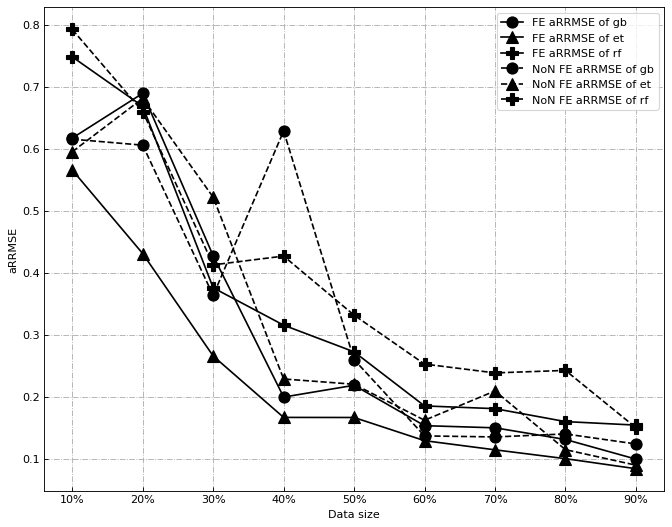

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
plt.grid('both', linestyle='-.')
plt.tick_params(axis='both', direction='in')
plt.plot(rrmse_fe_vis['Data size'], rrmse_fe_vis['arrmse_of gb'], 'ko-',markersize=10, label='FE aRRMSE of gb')
plt.plot(rrmse_fe_vis['Data size'], rrmse_fe_vis['arrmse_of et'],'^k-',markersize=10, label='FE aRRMSE of et')
plt.plot(rrmse_fe_vis['Data size'], rrmse_fe_vis['arrmse_of rf'],'Pk-',markersize=10, label='FE aRRMSE of rf')

plt.plot(rrmse_nonfe_vis['Data size'], rrmse_nonfe_vis['nonfe_arrmse_of gb'], 'ko--',markersize=10, label='NoN FE aRRMSE of gb')
plt.plot(rrmse_nonfe_vis['Data size'], rrmse_nonfe_vis['nonfe_arrmse_of et'],'^k--',markersize=10, label='NoN FE aRRMSE of et')
plt.plot(rrmse_nonfe_vis['Data size'], rrmse_nonfe_vis['nonfe_arrmse_of rf'],'Pk--',markersize=10, label='NoN FE aRRMSE of rf')

plt.ylabel('aRRMSE')
plt.xlabel('Data size')
plt.legend()
plt.savefig('/content/drive/MyDrive/data/aRRMSE.eps', format='eps', dpi=1000)
plt.show()

## aRMSE Visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

#for 10 splits and 10 n_repeates
def RMSE_model(model,X,y):
  cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
  reg = MultiOutputRegressor(model)
  scores = cross_val_score(reg, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)*-1
  rmse_vals = pd.Series(scores)
  return rmse_vals

In [ ]:
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

#for featuered engineerd data
rmse_fe = pd.DataFrame()
for model_key,model_val in models.items():
  rmse_fe[f'{model_key}'] = RMSE_model(model_val,x_trans,y_multi)

rmse_fe_melted=pd.melt(rmse_fe)
rmse_fe_melted['type'] = 'FE'
# rmse_fe_melted.head()

NameError: ignored

In [ ]:
for col in rmse_fe.columns:
  print(f'mean armse for {col}',rmse_fe[col].mean())

mean armse for gb 23.447715714438502
mean armse for et 22.381941705351593
mean armse for rf 31.314280100123383


In [ ]:
#for NON featured engineerd data
rmse_nonfe = pd.DataFrame()
for model_key,model_val in models.items():
  rmse_nonfe[f'{model_key}'] = RMSE_model(model_val,x_nonfe,y_multi)

rmse_nonfe_melted=pd.melt(rmse_nonfe)
rmse_nonfe_melted['type'] = 'Non FE'
# rmse_nonfe_melted

In [ ]:
for col in rmse_nonfe.columns:
  print(f'mean armse_nonfe for {col}',rmse_nonfe[col].mean())

mean armse_nonfe for gb 25.555708961686868
mean armse_nonfe for et 28.326435895382865
mean armse_nonfe for rf 33.16816762932391


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


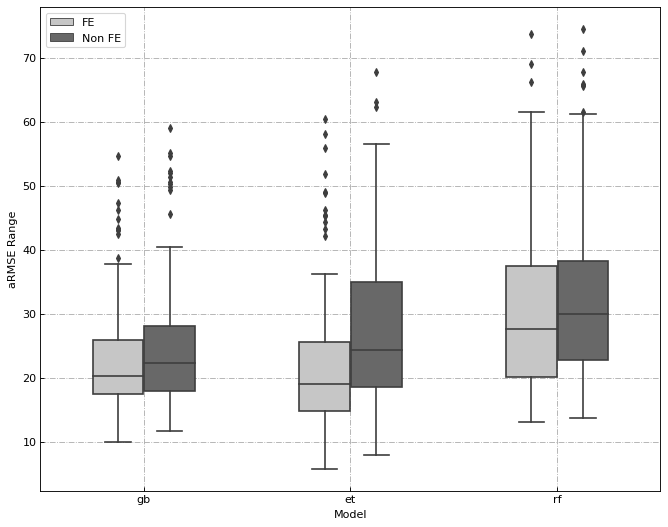

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#concate fe and nonfe dataframes in one to be able to visualize them
rmse_all = pd.concat([rmse_fe_melted,rmse_nonfe_melted])

#plotting our rmse plot
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.boxplot(x="variable", y="value", hue="type",
                 data=rmse_all, palette="Greys",width=.5)
ax.grid('both', linestyle='-.')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.legend(loc='upper left')
plt.ylabel('aRMSE Range')
plt.xlabel('Model')
plt.savefig('/content/drive/MyDrive/data/aRMSE.eps', format='eps', dpi=1000)
plt.show()

##R2 graph

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

def r2_for_ratio(model,X):
  # train_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
  train_size = {'10%':.1,'20%':.2,'50%':.5, '80%':.8, '90%':.9}
  r2_df = pd.DataFrame()

  #recreate dataframe from x_multi and y_multi
  df_multi_fun = X.copy()
  df_multi_fun[["Throughput","Latency"]] = df[["Throughput","Latency"]].copy()

  for key,size in train_size.items():
    #get random required size from our data
    df_multi_sampled = df_multi_fun.sample(frac=size,random_state=3)

    #x
    x_multi_sample=df_multi_sampled.copy()
    x_multi_sample.drop(columns = ['Throughput','Latency'],inplace = True)

    #y
    y_multi_sample=df_multi_sampled[["Throughput","Latency"]]
  
    reg = MultiOutputRegressor(model)
    cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=12)
    scores = cross_val_score(reg, x_multi_sample, y_multi_sample, scoring='r2', cv=cv, n_jobs=-1)
    r2_vals = pd.Series(scores)
    r2_df[f'{key}'] = r2_vals
  return r2_df

In [ ]:
#make r2_graph dataframe for featured engineered data
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

all_models_r2_df = pd.DataFrame()

for model_key,model_val in models.items():
  df_deform = pd.DataFrame()
  df_deform = r2_for_ratio(model_val,x_trans)
  df_deform=pd.melt(df_deform)
  df_deform['type'] = model_key
  # print(df_deform.head(15))
  all_models_r2_df = all_models_r2_df.append(df_deform, ignore_index = True)

#all_models_r2_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


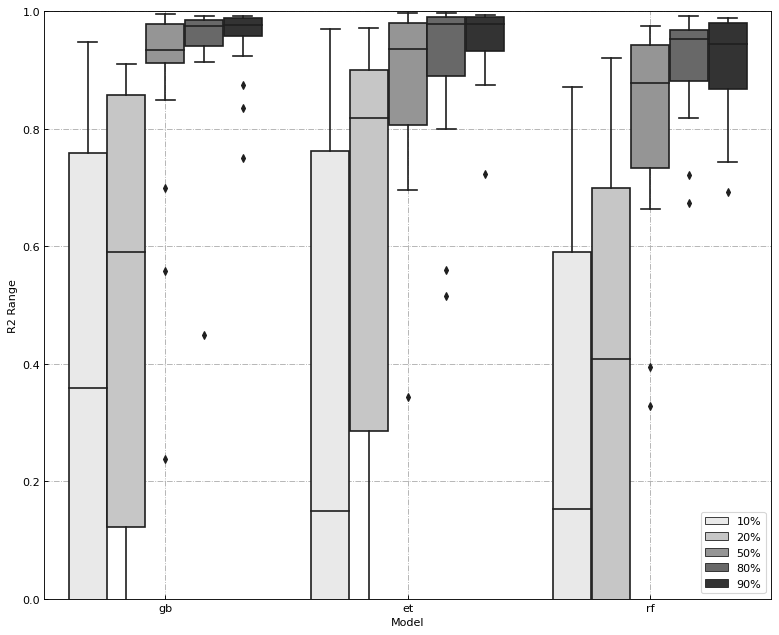

In [ ]:
#R2 score for different sizes for different models graph for featuered enginered data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.boxplot(x="type", y="value", hue="variable",
                 data=all_models_r2_df, palette="Greys")
ax.grid('both', linestyle='-.')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.legend(loc='lower right')
plt.ylabel('R2 Range')
plt.xlabel('Model')
plt.tight_layout()
axes = plt.axes()
axes.set_ylim([0, 1])
plt.savefig('/content/drive/MyDrive/data/R2Train.eps', format='eps', dpi=1000)
plt.show()


##R2 graph using learning_curve function

In [ ]:
# r2 using learning curve function
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import learning_curve

def r2_for_ratio_learn_curve(model,X):
  train_sizes = [.1, .2, .4, .5, .8, .9]

  #recreate dataframe from x_multi and y_multi
  df_multi_fun = X.copy()
  df_multi_fun[["Throughput","Latency"]] = df[["Throughput","Latency"]].copy()

  #x
  x_multi_sample=df_multi_fun.copy()
  x_multi_sample.drop(columns = ['Throughput','Latency'],inplace = True)

  #y
  y_multi_sample=df_multi_fun[["Throughput","Latency"]]

  reg = MultiOutputRegressor(model)
  
  train_sizes, train_scores, validation_scores = learning_curve(
  estimator = reg,
  X = x_multi_sample,
  y = y_multi_sample, train_sizes = train_sizes, cv = 10,shuffle = True,
  random_state =12, scoring = 'r2')
  
  validation_scores = validation_scores.transpose()
  print('validation scores = ', validation_scores)

  r2_df = pd.DataFrame(validation_scores, columns = ['10%','20%','40%','50%','80%','90%'])

  return r2_df

In [ ]:
#make r2_graph dataframe for featured engineered data
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

all_models_r2_df_lc = pd.DataFrame()

for model_key,model_val in models.items():
  df_deform_lc = pd.DataFrame()
  df_deform_lc = r2_for_ratio_learn_curve(model_val,x_nonfe)
  df_deform_lc=pd.melt(df_deform_lc)
  df_deform_lc['type'] = model_key
  # print(df_deform.head(15))
  all_models_r2_df_lc = all_models_r2_df_lc.append(df_deform_lc, ignore_index = True)

#all_models_r2_df

validation scores =  [[ 5.01498430e-01  7.68481049e-01 -3.28660150e+00  6.51986252e-01
   9.19921836e-01  9.28185051e-01]
 [-1.57109090e+00 -3.86862014e-01  5.80597746e-01 -1.79533423e-01
   8.95749303e-01  8.89042134e-01]
 [-2.07176272e+00  4.14885067e-01  9.02957263e-01  9.53732443e-01
   9.80477278e-01  9.74360836e-01]
 [-7.65492304e+00  8.17504841e-02  8.08141640e-01  8.83753575e-01
   9.06472093e-01  9.64340199e-01]
 [ 5.98127383e-01  9.51302451e-01  9.29791111e-01  9.75989623e-01
   9.81234362e-01  9.90800249e-01]
 [ 5.40637750e-01  7.35984538e-01  7.94730039e-01  7.85435972e-01
   9.58271041e-01  9.45453948e-01]
 [-1.13316216e+01 -1.13927751e+00  7.92944018e-03 -1.10088443e-01
   1.91258665e-01  3.72070734e-01]
 [-2.24502678e+00  6.80163580e-02 -4.88260279e-01  1.89121745e-01
   7.19176256e-01  7.39930530e-01]
 [-2.52861118e+00 -6.95004065e+00 -3.47400517e+00 -3.94390018e+00
  -1.09874625e+00  1.76992191e-01]
 [-1.78637270e+01 -5.82587791e+00 -4.47138583e+00 -3.76112579e+00
  -6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


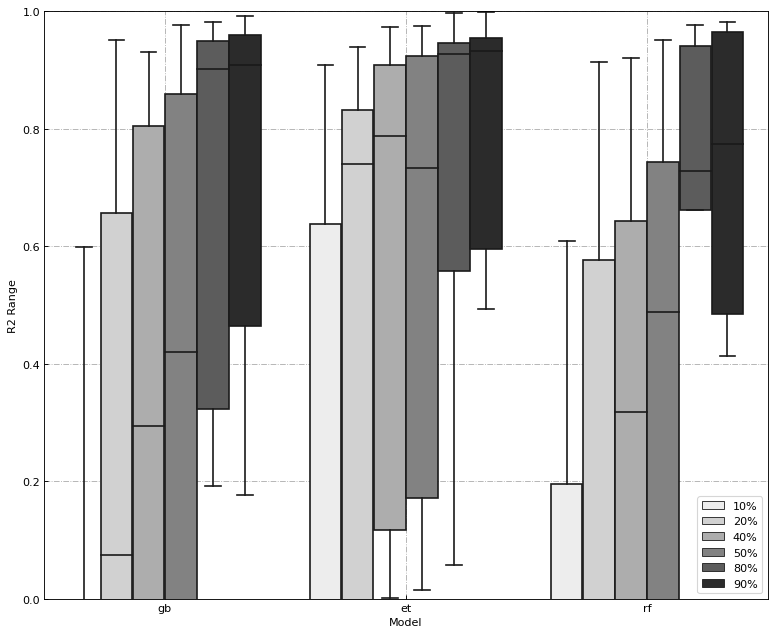

In [ ]:
#R2 score for different sizes for different models graph for featuered enginered data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.boxplot(x="type", y="value", hue="variable",
                 data=all_models_r2_df_lc, palette="Greys")
ax.grid('both', linestyle='-.')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.legend(loc='lower right')
plt.ylabel('R2 Range')
plt.xlabel('Model')
plt.tight_layout()
axes = plt.axes()
axes.set_ylim([0, 1])
plt.savefig('/content/drive/MyDrive/data/R2mod.eps', format='eps', dpi=1000)
plt.show()



##R2 comparison between fe and nonfe graph

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

def r2_model_comp(model,X,y):
  cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
  reg = MultiOutputRegressor(model)
  scores = cross_val_score(reg, X, y, scoring='r2', cv=cv, n_jobs=-1)
  rmse_vals = pd.Series(scores)
  return rmse_vals


In [ ]:
#R2 score for different models graph for featuered enginered data
grad_model = GradientBoostingRegressor(random_state=1)
et_model = ExtraTreesRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)
models = {'gb':grad_model,'et':et_model,'rf':rf_model}

r2_fe = pd.DataFrame()
#for featuered engineerd data
for model_key,model_val in models.items():
  r2_fe[f'{model_key}'] = r2_model_comp(model_val,x_trans,y_multi)

r2_fe_melted=pd.melt(r2_fe)
r2_fe_melted['type'] = 'FE'
# r2_fe_melted.head()

In [ ]:
for col in r2_fe.columns:
  print(f'mean r2 for {col}',r2_fe[col].mean())

mean r2 for gb 0.96497161405599
mean r2 for et 0.9541981784317004
mean r2 for rf 0.9379066425031232


In [ ]:
#for NON featuered engineerd data
r2_nonfe = pd.DataFrame()
for model_key,model_val in models.items():
  r2_nonfe[f'{model_key}'] = r2_model_comp(model_val,x_nonfe,y_multi)

r2_nonfe_melted=pd.melt(r2_nonfe)
r2_nonfe_melted['type'] = 'Non FE'
# r2_nonfe_melted

In [ ]:
for col in r2_nonfe.columns:
  print(f'mean r2 for Non-FE {col}',r2_nonfe[col].mean())

mean r2 for Non-FE gb 0.9569542108992454
mean r2 for Non-FE et 0.9219018259599627
mean r2 for Non-FE rf 0.9260042411532166


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


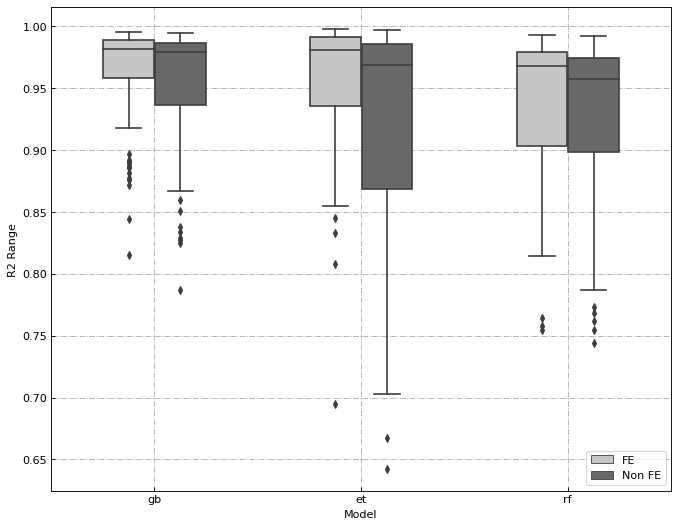

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#concate fe and nonfe dataframes in one to be able to visualize them
r2_all = pd.concat([r2_fe_melted,r2_nonfe_melted])

#plotting our r2 plot
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.boxplot(x="variable", y="value", hue="type",
                 data=r2_all, palette="Greys",width=.5)
ax.grid('both', linestyle='-.')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
plt.legend(loc='lower right')
plt.ylabel('R2 Range')
plt.xlabel('Model')
plt.savefig('/content/drive/MyDrive/data/R2FE.eps', format='eps', dpi=1000)
plt.show()